# Understanding Descriptive Statistics

Import the necessary libraries here:

In [118]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import random
import cufflinks as cf
import statistics

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def roll_dice(num_rolls):
    rolls = [random.randint(1, 6) for i in range(num_rolls)]
    return rolls

In [3]:
dice_rolls = roll_dice(10)
df_roll = pd.DataFrame({'Roll': range(1, 11), 'Result': dice_rolls})
df_roll

,Roll,Result
0,1,1
1,2,5
2,3,6
3,4,2
4,5,6
5,6,4
6,7,4
7,8,2
8,9,2
9,10,4


#### 2.- Plot the results sorted by value.

<Axes: xlabel='Result', ylabel='Count'>

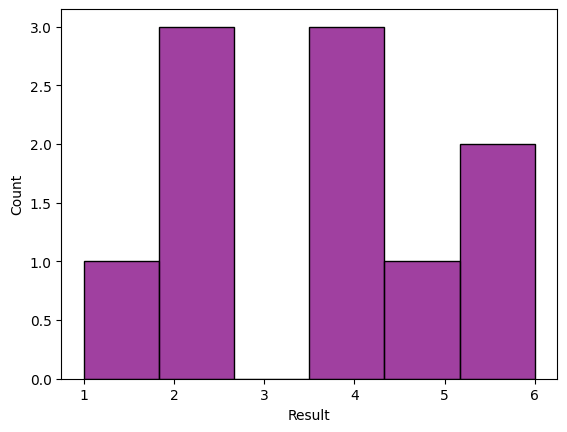

In [5]:
sns.histplot(x = "Result", bins = 6, data = df_roll, color = 'purple')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [6]:
# your code here
df_roll_freq = pd.crosstab(df_roll['Result'], 'Frequency').reset_index()
df_roll_freq

col_0,Result,Frequency
0,1,1
1,2,3
2,4,3
3,5,1
4,6,2


<Axes: xlabel='Result', ylabel='Frequency'>

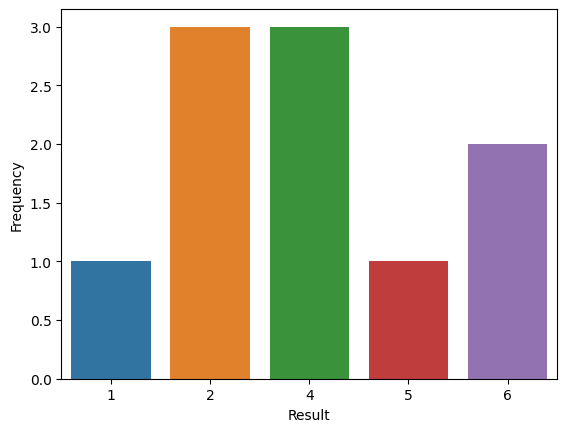

In [8]:
sns.barplot(x = 'Result', y = 'Frequency', data = df_roll_freq)

In [13]:
"""
The first plot is an histogram and it shows the distribution of every number from 1 to 6, 
while the second plot is a bar plot that only shows the numbers with a frequency of 1 or more.
"""

'\nThe first plot is an histogram and it shows the distribution of every number from 1 to 6, \nwhile the second plot is a bar plot that only shows the numbers with a frequency of 1 or more.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
dice_rolls.sort()
dice_rolls

[1, 2, 2, 2, 4, 4, 4, 5, 6, 6]

In [77]:
def mean_comp(my_list):
    return float(sum(my_list)/len(my_list))

In [78]:
mean_comp(dice_rolls)

3.6

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [19]:
dice_frequency = pd.Series(dice_rolls).value_counts()
dice_frequency

2    3
4    3
6    2
1    1
5    1
dtype: int64

In [79]:
mean_comp(dice_frequency)

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [80]:
def median_calc(my_list_b):
    lenght = len(my_list_b)
    my_list_b.sort()
    if lenght % 2 == 0:
        median_1 = my_list_b[lenght//2]
        median_2 = my_list_b[lenght//2 - 1]
        median_even = (median_1 + median_2) / 2
        return(float(median_even))
    else:
        median_odd = my_list_b[lenght//2]
        return(float(median_odd))

In [81]:
median_calc(dice_rolls)

4.0

In [58]:
dice_frequency_list = list(dice_frequency)
dice_frequency_list

[3, 3, 2, 1, 1]

In [82]:
median_calc(dice_frequency_list)

2.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [83]:
def quartiles(my_list_c):
    my_list_c.sort()
    lenght = len(my_list_c)
    #Q0
    q0 = my_list_c[0]
    #Q1
    if lenght % 4 == 0:
        q1_1 = my_list_c[(lenght/4) - 1] 
        q1_2 = my_list_c[(lenght/4)] 
        q1 = (q1_1 + q1_2) / 2
    else:
        q1 = my_list_c[lenght//4]
    #Q2
    if lenght % 2 == 0:
        median_1 = my_list_c[lenght//2]
        median_2 = my_list_c[lenght//2 - 1]
        q2 = (median_1 + median_2) / 2
    else:
        q2 = my_list_c[lenght//2]
    #Q3    
    if (lenght*3) % 4 == 0:
        q3_1 = my_list_c[(lenght*3/4 - 1)]
        q3_2 = my_list_c[(lenght*3/4)]
        q3 = (q3_1 + q3_2) / 2
    else:
        q3 = my_list_c[(lenght*3)//4]  
    #Q4
    q4 = my_list_c[-1]
    return print(f"Q0 = {float(q0)}",
                f"\nQ1 = {float(q1)}",
                f"\nQ2 = {float(q2)}",
                f"\nQ3 = {float(q3)}",
                f"\nQ4 = {float(q4)}")

In [84]:
quartiles(dice_rolls)

Q0 = 1.0 
Q1 = 2.0 
Q2 = 4.0 
Q3 = 5.0 
Q4 = 6.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [85]:
roll_dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv') 
roll_dice_hundred

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


<Axes: xlabel='value', ylabel='Count'>

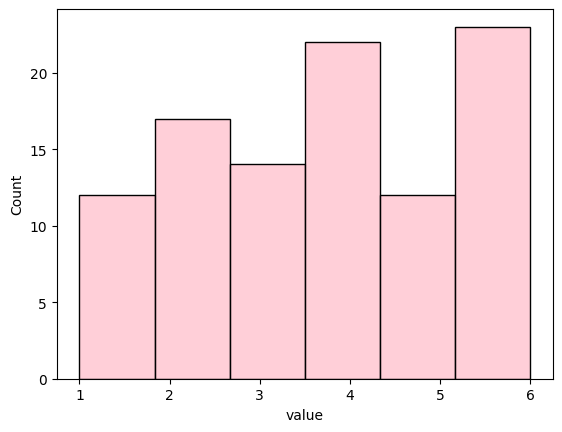

In [87]:
sns.histplot(x = "value", bins = 6, data = roll_dice_hundred, color = 'pink')

In [ ]:
"""
There are very similar frequencies between the numbers.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [93]:
roll_dice_hundred_list = list(roll_dice_hundred["value"])

In [94]:
mean_comp(roll_dice_hundred_list)

3.74

#### 3.- Now, calculate the frequency distribution.


In [96]:
rdh_freq = pd.crosstab(roll_dice_hundred['value'], 'Frequency').reset_index()
rdh_freq

col_0,value,Frequency
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

<Axes: xlabel='value', ylabel='Frequency'>

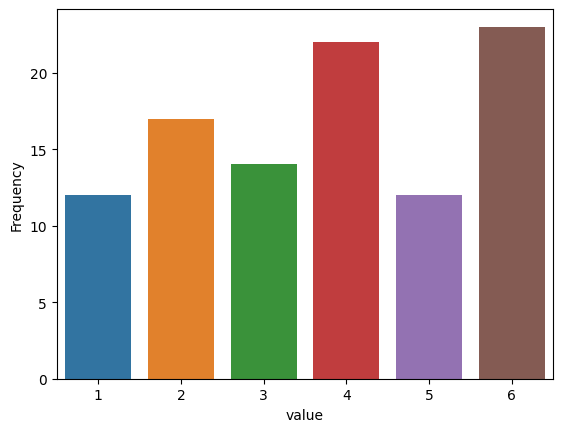

In [97]:
sns.barplot(x = 'value', y = 'Frequency', data = rdh_freq)

In [ ]:
"""
There are very similar frequencies between the numbers, 
that means that we will have a mean value close to the 
mean of the numbers we are analyzing, wich are form 1 to 6.
The mean of that is 3.5.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [99]:
roll_dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv') 
roll_dice_thousand

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


<Axes: xlabel='value', ylabel='Count'>

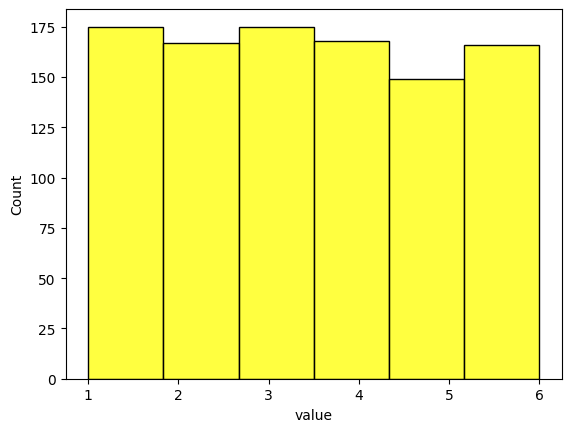

In [100]:
sns.histplot(x = "value", bins = 6, data = roll_dice_thousand, color = 'yellow')

In [101]:
rdt_freq = pd.crosstab(roll_dice_thousand['value'], 'Frequency').reset_index()
rdt_freq

col_0,value,Frequency
0,1,175
1,2,167
2,3,175
3,4,168
4,5,149
5,6,166


<Axes: xlabel='value', ylabel='Frequency'>

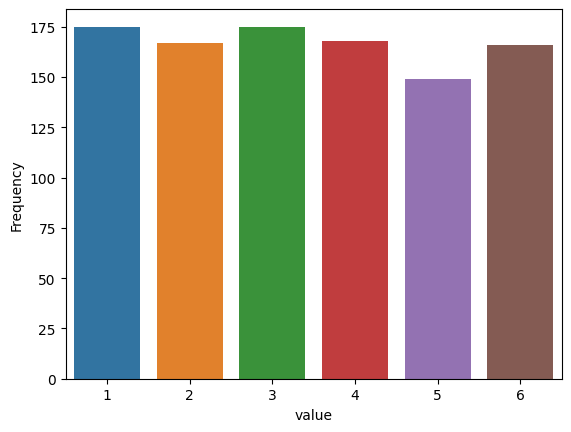

In [102]:
sns.barplot(x = 'value', y = 'Frequency', data = rdt_freq)

In [ ]:
"""
The similarity of the frequencys increases when the
number of rolls increases, this is due to probability.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [104]:
ages_population = pd.read_csv('../data/ages_population.csv') 
ages_population

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [111]:
ages_population_freq = pd.crosstab(ages_population['observation'], 'Frequency').reset_index()
ages_population_freq

col_0,observation,Frequency
0,1.0,2
1,2.0,2
2,4.0,1
3,5.0,2
4,6.0,2
...,...,...
67,69.0,1
68,70.0,1
69,71.0,1
70,73.0,1


<Axes: xlabel='observation', ylabel='Count'>

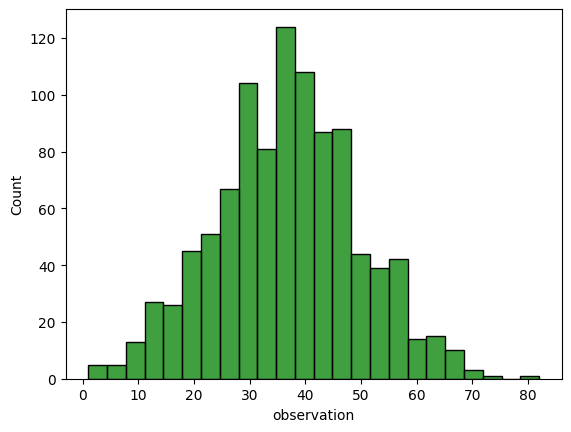

In [116]:
sns.histplot(x = "observation", data = ages_population, color = 'green')

In [ ]:
""""
The mean should be between 30 and 40.
The standard deviation should be low.
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [119]:
statistics.stdev(ages_population["observation"])

12.81649962597677

In [121]:
statistics.mean(ages_population["observation"])

36.56

In [ ]:
"""
They fall inside the ranges I guessed, 
although the stdev is a bit higher than I expected.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [122]:
ages_population_2 = pd.read_csv('../data/ages_population2.csv') 
ages_population_2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [123]:
ages_population_2_freq = pd.crosstab(ages_population_2['observation'], 'Frequency').reset_index()
ages_population_2_freq

col_0,observation,Frequency
0,19.0,3
1,20.0,13
2,21.0,17
3,22.0,35
4,23.0,41
5,24.0,78
6,25.0,98
7,26.0,120
8,27.0,125
9,28.0,139


<Axes: xlabel='observation', ylabel='Count'>

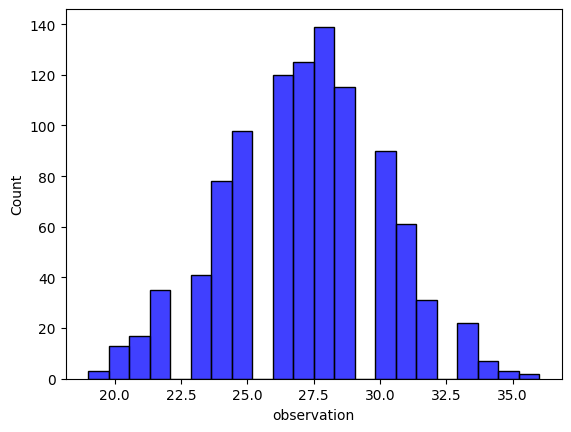

In [124]:
sns.histplot(x = "observation", data = ages_population_2, color = 'blue')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Theres a bigger range in the first datsaset. 
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [125]:
statistics.stdev(ages_population_2["observation"])

2.9698139326891835

In [126]:
statistics.mean(ages_population_2["observation"])

27.155

In [ ]:
"""
There's a smaller mean and a smaller stdev, 
the data is more clustered.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [127]:
ages_population_3 = pd.read_csv('../data/ages_population3.csv') 
ages_population_3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [130]:
ages_population_3_freq = pd.crosstab(ages_population_3['observation'], 'Frequency').reset_index()
ages_population_3_freq

col_0,observation,Frequency
0,1.0,1
1,2.0,2
2,4.0,2
3,5.0,1
4,7.0,1
...,...,...
70,73.0,6
71,74.0,6
72,75.0,2
73,76.0,1


<Axes: xlabel='observation', ylabel='Count'>

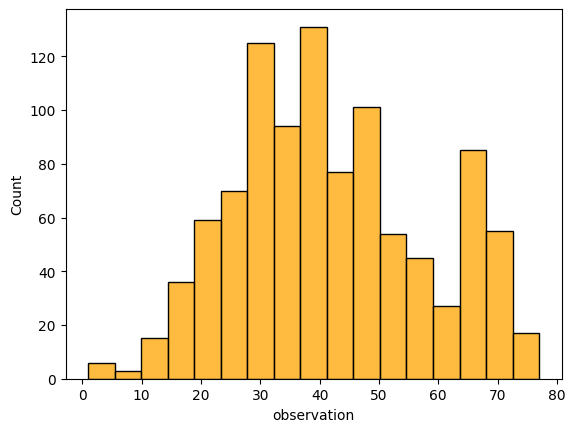

In [131]:
sns.histplot(x = "observation", data = ages_population_3, color = 'orange')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [128]:
statistics.stdev(ages_population_3["observation"])

16.14470595986593

In [129]:
statistics.mean(ages_population_3["observation"])

41.989

In [ ]:
"""
There is a bigger mean and a bigger stdev.
The data is more spreadout and is only taking 
into account people until 77 years old, not 82.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [138]:
np.quantile(ages_population_3, [0,0.25,0.5,0.75,1])

array([ 1., 30., 40., 53., 77.])

In [137]:
print(f"Q0 = 1",
f"\nQ1 = 30"
f"\nQ2 = 40",
f"\nQ3 = 53",
f"\nQ4 = 77")

Q0 = 1 
Q1 = 30
Q2 = 40 
Q3 = 53 
Q4 = 77


In [140]:
statistics.mean(ages_population_3["observation"])

41.989

In [135]:
np.quantile(ages_population, [0,0.25,0.5,0.75,1])

array([ 1., 28., 37., 45., 82.])

In [139]:
print(f"Q0 = 1",
f"\nQ1 = 28"
f"\nQ2 = 37",
f"\nQ3 = 45",
f"\nQ4 = 82")

Q0 = 1 
Q1 = 28
Q2 = 37 
Q3 = 45 
Q4 = 82


In [141]:
statistics.mean(ages_population["observation"])

36.56

In [ ]:
"""
The difference in range in both datasets makes the differences in the quartiles.
The median and the mean are 2 points difference in both datasets.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [142]:
ages_population.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [144]:
ages_population.mode()

,observation
0,39.0


In [143]:
ages_population_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [145]:
ages_population_3.mode()

,observation
0,32.0


In [ ]:
"""
The main difference between both dataframes is the max age,
which changes evere statistics results according.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [146]:
ages_population.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [147]:
ages_population_2.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [148]:
ages_population_3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
All dataframes have 1000 subjects.
The second dataframe has the smallest range of ages, therefore, they are more clustered.
The first and seconda dataframes are more similar but they have different max age, which makes the differences.
"""